**Homework 5**

Problem 1.

We will set up normal distribution with a modest sigma of 3. And a signal with a random strength on an interval of 0-20

In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import math
from scipy import optimize

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
bkgd = stats.norm.rvs(loc=0,scale = 3,size=1000000)
signal=np.random.uniform(low=0.0, high=20, size=(1000000))

data = bkgd + signal

In [4]:
singaledges = np.linspace(0,20,40)
dataeges = np.linspace(-7,27,68)

In [5]:
Psd, temp, temp2 =np.histogram2d(data,signal,bins=[dataeges,singaledges],density=True)

In [6]:
datacenters = (dataeges[:-1]+dataeges[1:])/2
signalcenters = (singaledges[:-1]+singaledges[1:])/2

Text(0.5, 0, 'Observed data, $P(d|s)$')

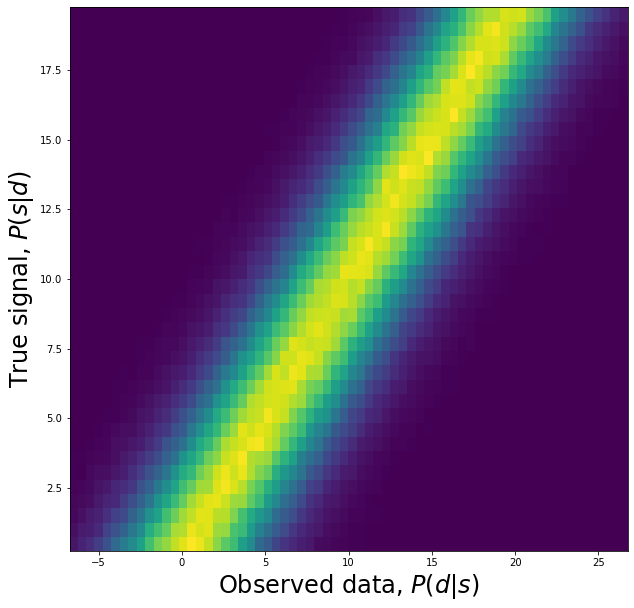

In [7]:
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Problem 1b

Below we are plotting a horizontal slice of the graph above, a slice at signal strength of 10. This tells us if we have a signal of strength 10 we will see a distribution of observed data points with the distribution below

Text(0.5, 0, 'Observed data')

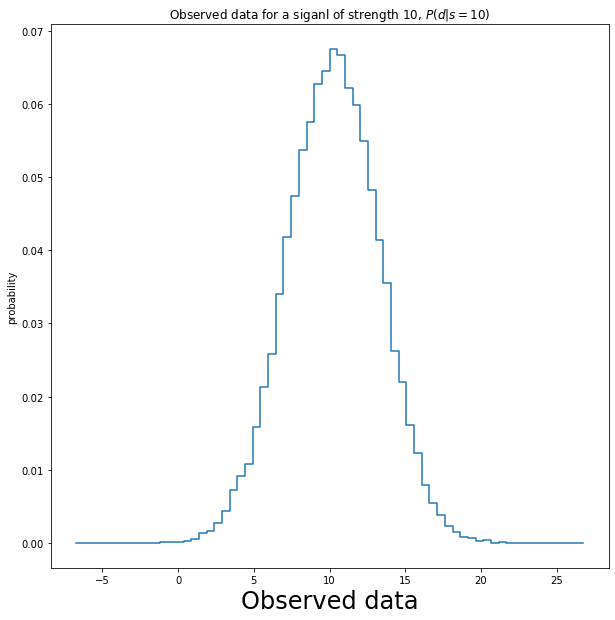

In [8]:
data = pd.DataFrame(Psd)
plt.matplotlib.pyplot.step(datacenters,data[20]/np.trapz(data[20]))
plt.ylabel('probability')
plt.title('Observed data for a siganl of strength 10, $P(d|s=10)$')
plt.xlabel('Observed data', fontsize = 24)


Now we are doing a vertical slice of the two 2D plot. This graph tells us if we were to observe a data point of strength 15 what is the probability distribution of the true single strength that would result in this data point being measured


15.328358208955226

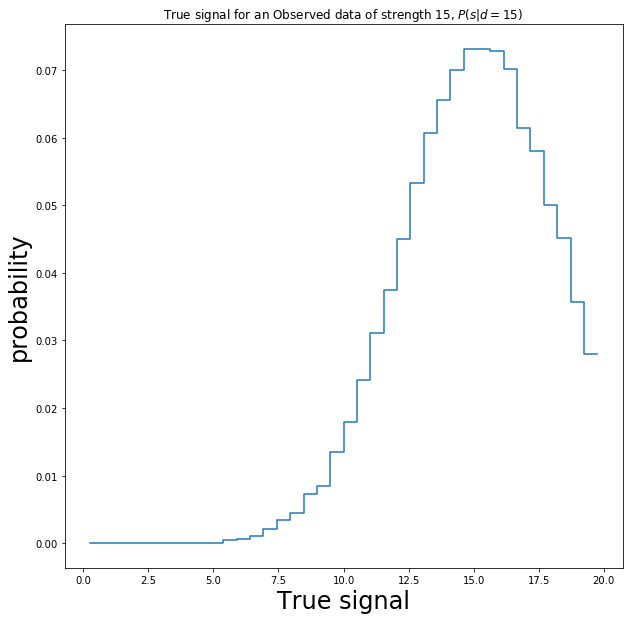

In [10]:
plt.matplotlib.pyplot.step(signalcenters,Psd[44]/np.trapz(Psd[44]))
plt.ylabel('True signal, $P(s|d=15)$', fontsize = 24)

plt.ylabel('probability')
plt.title('True signal for an Observed data of strength 15, $P(s|d=15)$')
plt.xlabel('True signal', fontsize = 24)
temp[44]

Problem 2

We will repeat what we did above but with a background that has a non-zero mean. We will be using a Gaussian with a mean of 5 for this

In [12]:
bkgd = stats.norm.rvs(loc=5,scale = 3,size=1000000)
signal=np.random.uniform(low=0.0, high=20, size=(1000000))

data = bkgd + signal

In [13]:
singaledges = np.linspace(0,20,40)
dataeges = np.linspace(-7,27,68)
Psd, temp, temp2 =np.histogram2d(data,signal,bins=[dataeges,singaledges],density=True)
datacenters = (dataeges[:-1]+dataeges[1:])/2
signalcenters = (singaledges[:-1]+singaledges[1:])/2

Text(0.5, 0, 'Observed data, $P(d|s)$')

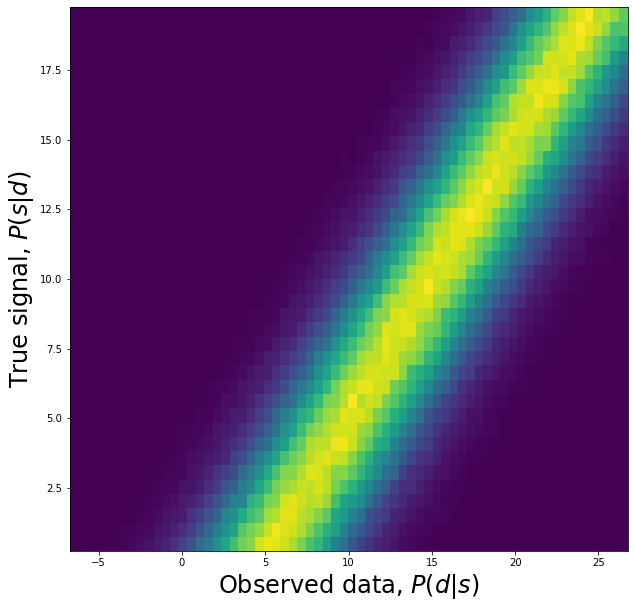

In [14]:
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Text(0.5, 0, 'Observed data')

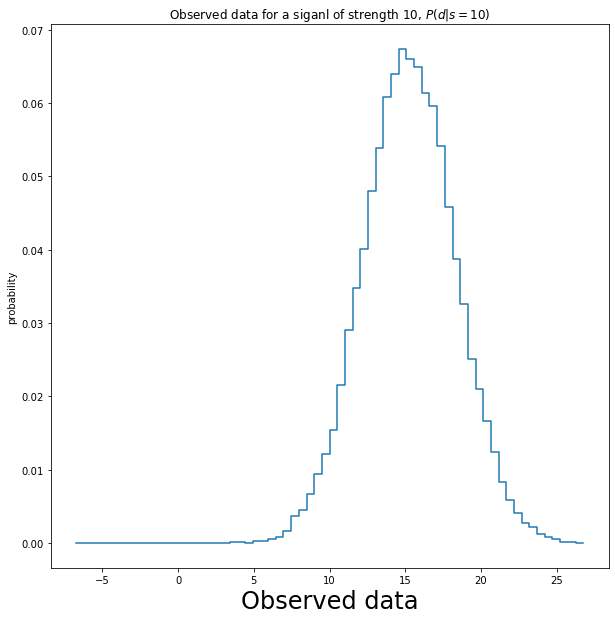

In [15]:
data = pd.DataFrame(Psd)
plt.matplotlib.pyplot.step(datacenters,data[20]/np.trapz(data[20]))
plt.ylabel('probability')
plt.title('Observed data for a siganl of strength 10, $P(d|s=10)$')
plt.xlabel('Observed data', fontsize = 24)



15.328358208955226

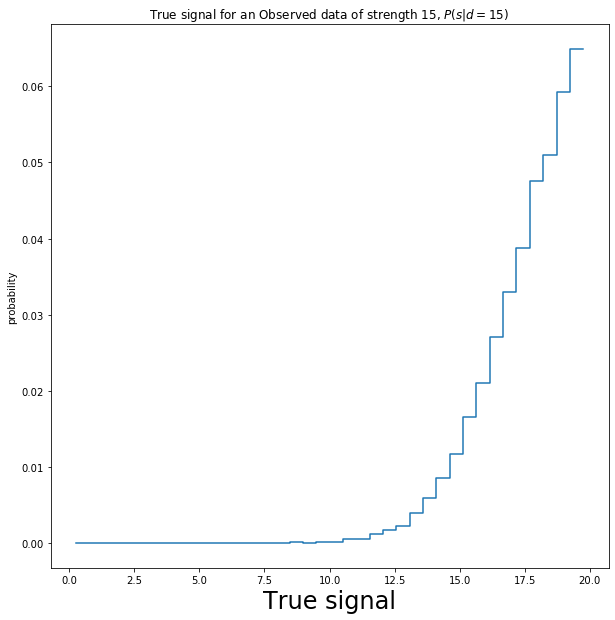

In [18]:
plt.matplotlib.pyplot.step(signalcenters,Psd[64]/np.trapz(Psd[44]))
plt.ylabel('probability')
plt.title('True signal for an Observed data of strength 15, $P(s|d=15)$')
plt.xlabel('True signal', fontsize = 24)
temp[44]

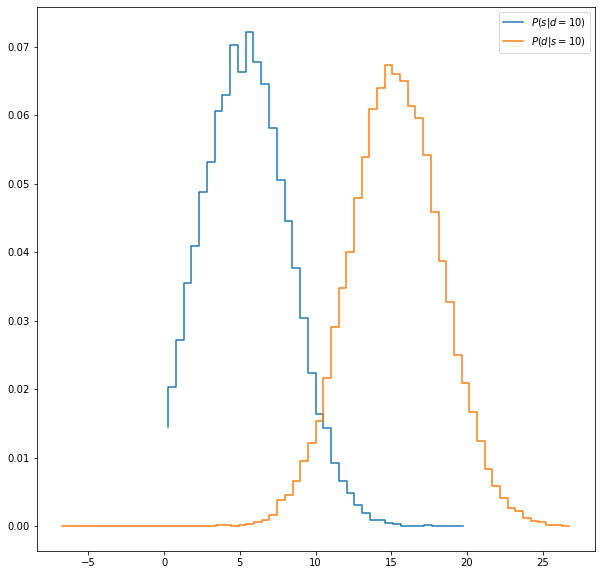

In [23]:
plt.matplotlib.pyplot.step(signalcenters,Psd[34]/np.trapz(Psd[34]),label ='$P(s|d=10)$')
plt.matplotlib.pyplot.step(datacenters,data[20]/np.trapz(data[20]),label ='$P(d|s=10)$')
plt.legend()

Now we are plotting a horizontal and vertical slice of the 2D graph. The two graphs are not centers on the same value since when going from a pure signal to a data consisting of a background with a signal injected into the background, the background shifts the signal over by an average of 15. In other words, it biases the data. Which is what we see